# Stats and Plots of Recall of simulated 1000G Mosaic data
Relies heavily on functions in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import sys as sys
import multiprocessing as mp
import socket as socket

socket_name = socket.gethostname()
print(socket_name)
if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./notebook/simulate/python/")  # Assume we are in Hapsburg Root Directory
#from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..

from load_funcs import Summary_IBD_Calls, Summary_IBD_Calls_Error, Summary_IBD_Calls_Missing,\
                       statistics_power_df, calc_power, give_SE, give_bias,\
                       false_power_statistics, return_calls_only, false_positive_nrs
from plot_funcs import plot_power, plot_fp_distribution

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

compute-a-16-154.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 32


# Plot recall Histograms
### TODO: Update the functions from ROH to IBD

In [17]:
bl_lens=[4, 8, 12, 16, 20]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_IBD_Calls(mosaic_folder="./output/simulated/TSI/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "default/", output=1)

df_fp = roh.collect_fp_df()  # Call FPs
#roh = Summary_ROH_Calls_Missing(mosaic_folder="./Simulated/1000G_Mosaic/CHB/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "", output=1, missing=0.9)
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 400
Total Nr Called: 379
Total Nr Simulated: 400
Total Nr Called: 400
Total Nr Simulated: 400
Total Nr Called: 401
Total Nr Simulated: 400
Total Nr Called: 400
Total Nr Simulated: 400
Total Nr Called: 401


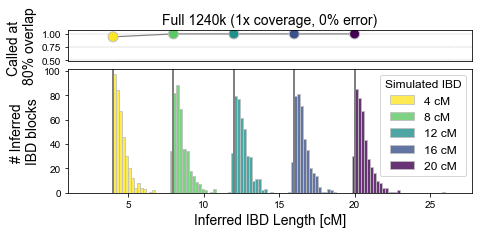

In [19]:
plot_power(bl_lens, df_called, power, df_fp=df_fp, title="Full 1240k (1x coverage, 0% error)", 
           savepath="", figsize=(7.25,3), ylim_pow=[0.49,1.08], hspace=0.1,
           fs_l=12, fs=14,
           xlim=[1,27.8])   # ./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf

# Plot the Individuals with 0.5x coverage, and 0.99 GP

In [2]:
bl_lens=[4, 8, 12, 16, 20]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_IBD_Calls(mosaic_folder="./output/simulated/TSI05/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "default/", output=1)

df_fp = roh.collect_fp_df()  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 400
Total Nr Called: 828
Total Nr Simulated: 400
Total Nr Called: 796
Total Nr Simulated: 400
Total Nr Called: 736
Total Nr Simulated: 400
Total Nr Called: 690
Total Nr Simulated: 400
Total Nr Called: 686


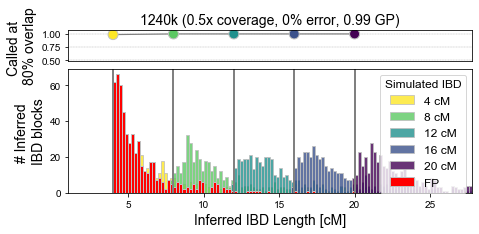

In [3]:
plot_power(bl_lens, df_called, power, df_fp=df_fp, title="1240k (0.5x coverage, 0% error, 0.99 GP)", 
           savepath="", figsize=(7.25,3), ylim_pow=[0.49,1.08], hspace=0.1,
           fs_l=12, fs=14,
           xlim=[1,27.8])   # ./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf

# Plot the Individuals with 1.0x coverage, and 0.99 GP and shuffled

In [94]:
bl_lens=[4, 8, 12, 16, 20]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_IBD_Calls(mosaic_folder="./output/simulated/TSIs05/", ch=3, nr_iid = 100,
                        min_cm=4, blen_cm = 0, output_prefix = "default/", output=1)

df_fp = roh.collect_fp_df()  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 400
Total Nr Called: 438
Total Nr Simulated: 400
Total Nr Called: 449
Total Nr Simulated: 400
Total Nr Called: 401
Total Nr Simulated: 400
Total Nr Called: 430
Total Nr Simulated: 400
Total Nr Called: 437


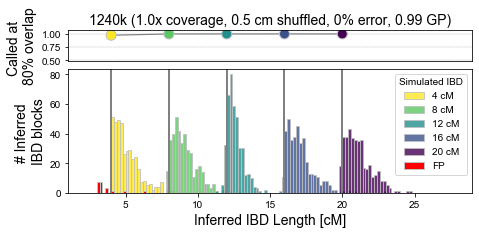

In [95]:
plot_power(bl_lens, df_called, power, df_fp=df_fp, title="1240k (1.0x coverage, 0.5 cm shuffled, 0% error, 0.99 GP)", 
           savepath="", figsize=(7.25,3), ylim_pow=[0.49,1.08], hspace=0.1,
           fs_l=10, fs=14,
           xlim=[1,29])   # ./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf

# Plot individuals with 0.7x coverage

In [3]:
bl_lens=[4, 8, 12, 16, 20]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_IBD_Calls(mosaic_folder="./output/simulated/TSI07/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "default/", output=1, min_cm=4)

df_fp = roh.collect_fp_df(min_cm=4)  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 400
Total Nr Called: 494
Total Nr Simulated: 400
Total Nr Called: 511
Total Nr Simulated: 400
Total Nr Called: 516
Total Nr Simulated: 400
Total Nr Called: 487
Total Nr Simulated: 400
Total Nr Called: 490


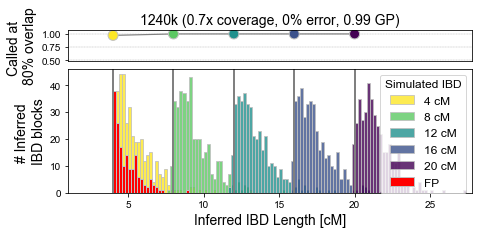

In [4]:
plot_power(bl_lens, df_called, power, df_fp=df_fp, title="1240k (0.7x coverage, 0% error, 0.99 GP)", 
           savepath="", figsize=(7.25,3), ylim_pow=[0.49,1.08], hspace=0.1,
           fs_l=12, fs=14, xlim=[1,27.8])   # ./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf

# Plot indivdiuals with 0.7x coverage and shuffled

In [5]:
bl_lens=[4, 8, 12, 16, 20]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_IBD_Calls(mosaic_folder="./output/simulated/TSI07s05/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "default/", output=1, min_cm=4)

df_fp = roh.collect_fp_df(min_cm=4)  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 400
Total Nr Called: 515
Total Nr Simulated: 400
Total Nr Called: 503
Total Nr Simulated: 400
Total Nr Called: 507
Total Nr Simulated: 400
Total Nr Called: 481
Total Nr Simulated: 400
Total Nr Called: 488


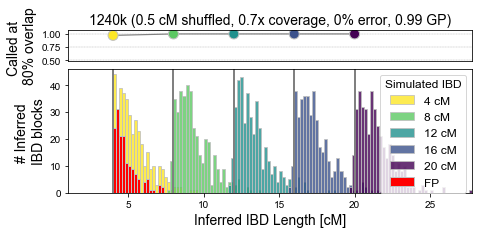

In [6]:
plot_power(bl_lens, df_called, power, df_fp=df_fp, title="1240k (0.5 cM shuffled, 0.7x coverage, 0% error, 0.99 GP)", 
           savepath="", figsize=(7.25,3), ylim_pow=[0.49,1.08], hspace=0.1,
           fs_l=12, fs=14, xlim=[1,27.8])   # ./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf

# Plot indivdiuals with 0.7x coverage, 0.5 cM shuffled and 1% error added

In [85]:
bl_lens=[4, 8, 12, 16, 20]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_IBD_Calls(mosaic_folder="./output/simulated/TSI07s05e1/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "default/", output=1, min_cm=4)

df_fp = roh.collect_fp_df(min_cm=2.5)  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 400
Total Nr Called: 497
Total Nr Simulated: 400
Total Nr Called: 485
Total Nr Simulated: 400
Total Nr Called: 402
Total Nr Simulated: 400
Total Nr Called: 469
Total Nr Simulated: 400
Total Nr Called: 478


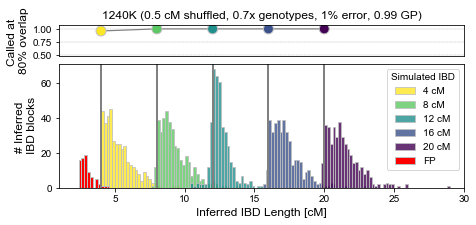

In [86]:
plot_power(bl_lens, df_called, power, df_fp=df_fp, title="1240K (0.5 cM shuffled, 0.7x genotypes, 1% error, 0.99 GP)", 
           savepath="", figsize=(7.25,3), ylim_pow=[0.49,1.08], hspace=0.1,
           fs_l=10, fs=12, fs_t=10, xlim=[1,30.0])   # ./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf

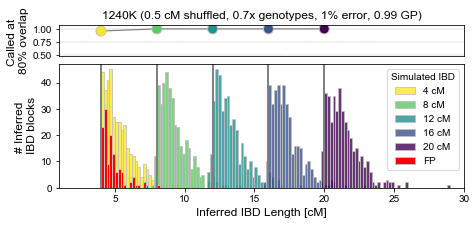

In [9]:
plot_power(bl_lens, df_called, power, df_fp=df_fp, title="1240K (0.5 cM shuffled, 0.7x genotypes, 1% error, 0.99 GP)", 
           savepath="", figsize=(7.25,3), ylim_pow=[0.49,1.08], hspace=0.1,
           fs_l=10, fs=12, fs_t=10, xlim=[1,30.0])   # ./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf

# Get statistics of run to fine-tune IBD caller [without plotting]
Get key statistics to fine-tune IBD caller

In [83]:
bl_focus = 12 ### Which Statistics to show (when needed)
ch = 3
nr_iid = 100
folder = "./output/simulated/TSI07s05e1/"
output_prefix = "gap006/"

ibd = Summary_IBD_Calls(mosaic_folder=folder, ch=ch, nr_iid = nr_iid, 
                        blen_cm = bl_focus, output_prefix = output_prefix, output=1)
df_power = ibd.collect_power_df()
statistics_power_df(df_power, min_frac=0.8)
give_SE(df_power)
give_bias(df_power);

Total Nr Simulated: 400
Total Nr Called: 402
100 unique Individuals
400 / 400 Blocks called
400 Blocks called > 80.0 %
12.5478 average Block Length cM (called)
Standard Deviation: 0.700761 cM
Bias: 0.547835 cM


In [84]:
bl_focus=0
ibd = Summary_IBD_Calls(mosaic_folder=folder, ch=ch, nr_iid = nr_iid, 
                        blen_cm = bl_focus, output_prefix = output_prefix, output=1)
df_power = ibd.collect_power_df()

Total Nr Simulated: 0
Total Nr Called: 3


# Add error

In [15]:
dft = pd.read_csv("./output/simulated/TSI07/ch3_0cm/inferred/iid15A_iid15B/chr3/default/ibd.tsv", sep="\t")

In [16]:
dft

,Start,End,StartM,EndM,length,lengthM,iid,ch
0,1870,2497,0.105762,0.151385,627,0.045623,iid0,3
1,50488,51278,1.959767,2.010812,790,0.051045,iid0,3


In [12]:
print("test")

test


In [18]:
df_power

,Overlap,CalledLength,OriginalLength,OverlapFrac,Position,iid1,iid2
0,12.000000,13.6321,12.0,1.000000,27.006748,iid0A,iid0B
1,12.000000,13.6329,12.0,1.000000,79.730334,iid0A,iid0B
2,12.000000,13.8748,12.0,1.000000,116.054277,iid0A,iid0B
3,12.000000,12.3105,12.0,1.000000,193.688453,iid0A,iid0B
0,11.571977,13.7898,12.0,0.964331,6.228223,iid1A,iid1B
...,...,...,...,...,...,...,...
3,11.780259,11.9039,12.0,0.981688,171.603741,iid98A,iid98B
0,12.000000,13.3795,12.0,1.000000,21.622635,iid99A,iid99B
1,12.000000,12.9161,12.0,1.000000,73.135463,iid99A,iid99B
2,12.000000,12.4523,12.0,1.000000,131.946306,iid99A,iid99B
